### images

In [4]:
import cv2
import matplotlib.pyplot as plt

# read the image 
img = cv2.imread("../testimg.jpg",)

# some flags 
cv2.IMREAD_COLOR # loading a color image 
cv2.IMREAD_GRAYSCALE # loading image as grayscale 
cv2.IMREAD_UNCHANGED # loading image with alpha channel

# COLOR ORDER 
# cv2 -> BGR 
# matplotlib -> RGB 
# cv2 -> matplotlib (BGR-> RGB)

-1

(-0.5, 1199.5, 600.5, -0.5)

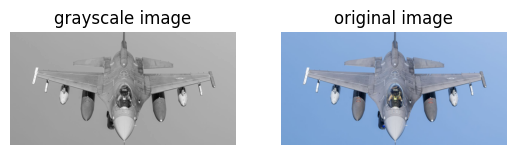

In [20]:
# read as grayscale 
img_grey = cv2.imread("../testimg.jpg", flags=cv2.IMREAD_GRAYSCALE)

# read as original 
img_org = cv2.imread("../testimg.jpg", flags=cv2.IMREAD_COLOR)


fig, axes = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = axes.flatten()

ax1.imshow(img_grey,cmap="gray")
ax1.set_title("grayscale image")
ax1.axis("off")

# convert BGR to RGB
img_org = cv2.cvtColor(img_org, code=cv2.COLOR_BGR2RGB)
ax2.imshow(img_org)
ax2.set_title("original image")
ax2.axis("off")



**Resizing**

(-0.5, 99.5, 49.5, -0.5)

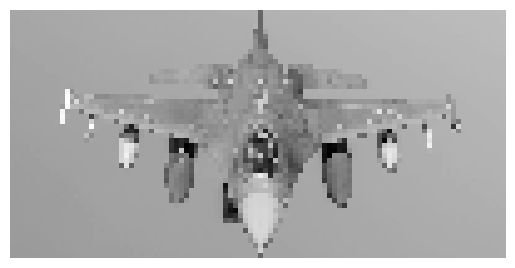

In [27]:
img = cv2.imread("../testimg.jpg", 0)

# resize image 
img = cv2.resize(img,dsize=(100,50)) # takes in (W,H)

plt.imshow(img, cmap="gray")
plt.axis("off")

**cropping**

Format: [y_start:y_end, x_start:x_end]

(-0.5, 599.5, 199.5, -0.5)

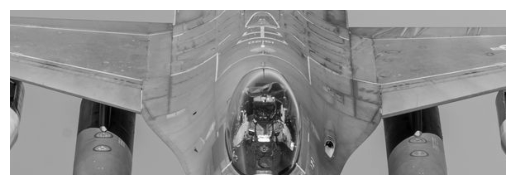

In [31]:
img = cv2.imread("../testimg.jpg", 0)

# cropping image 
cropped = img[200:400,300:900]

plt.imshow(cropped, cmap="gray")
plt.axis("off")

In [32]:
# to save the image 
# cv2.imwrite("x.png", cropped)

### Dimensionality

**curse of dimensionality:**

1. **Increased Computational Complexity**: As the number of dimensions (features) in a dataset increases, the computational complexity of algorithms grows exponentially. 

2. **Sparse Data**: In high-dimensional spaces, data points become sparse. This sparsity means that data points are spread out far from each other, making it difficult to find patterns or meaningful clusters. This *sparsity can lead to overfitting*, as models may capture noise rather than true underlying patterns.

3. **Distance Metrics**: Many machine learning algorithms rely on distance metrics (like Euclidean distance) to make predictions. In high-dimensional spaces, the distance between points becomes less meaningful because all points tend to be equidistant from each other. This diminishes the effectiveness of algorithms based on these metrics.

4. **Curse on Visualization**: Visualizing high-dimensional data is challenging because humans can only perceive three dimensions directly. 

5. **Overfitting Risk**: With an increasing number of features, models can become overly complex and tailor themselves too closely to the training data. 

#### Principal component analysis (PCA)
- Unsupervised
- projects observations onto the principal components of the feature matrix that retain the most variance

**Steps**

Step 1: Standardize the dataset.

Step 2: Calculate the covariance matrix for the features in the dataset.

Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix. 

Step 4: Sort eigenvalues and their corresponding eigenvectors.

Step 5: Pick k eigenvalues and form a matrix of eigenvectors.

Step 6: Transform the original matrix.


- Every subsequent principal component needs to be orthogonal to the previous principal components
- Notice that PCA doesn’t reduce data dimension directly but finds new axes for the data

In [33]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
# get the mnist 
digits = datasets.load_digits()

# perform step 1 
features = StandardScaler().fit_transform(digits.data)

# run the pca 
pca = PCA(n_components=0.99, whiten=True)
# Number of components to keep. 
# n_components == min(n_samples, n_features)
# making the data “spherical” in the sense that each principal component (each new dimension) has roughly the same spread

# apply 
features_pca = pca.fit_transform(features)

print(f"Original Number of features :",features.shape[1])
print(f"Reduced Number of features :",features_pca.shape[1])


Original Number of features : 64
Reduced Number of features : 54


#### Kernel PCA

- While traditional PCA is highly effective for linear data, it may not capture the underlying structure of complex, nonlinear datasets
- KPCA relies on the intuition that many data sets that are not linearly separable in their current dimension can be linearly separable by projecting them into a higher-dimension space.
-  KPCA takes our data set, maps it into some higher dimension, and then performs PCA in that new dimensional space.
  
![](https://www.baeldung.com/wp-content/uploads/sites/4/2023/10/pca_example_2.png)

![](https://www.baeldung.com/wp-content/uploads/sites/4/2023/10/pca_example_3.png)


Popular kernel functions include:

- Linear
- Polynomial
- GaussRBF
- Sigmoid

Selecting the optimal kernel for a model is often challenging.
A practical approach is to consider the kernel and its parameters as hyperparameters, using cross-validation to determine them alongside other model hyperparameters.

In [37]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

# create a non linear data 
features, _ = make_circles(n_samples=1000, random_state= 1, noise=0.1, factor=0.1)

# define kpca
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)

# fit 
feature_kpca = kpca.fit_transform(features)


print(f"Original Number of features :",features.shape[1])
print(f"Reduced Number of features :",feature_kpca.shape[1])


Original Number of features : 2
Reduced Number of features : 1


### LDA (Linear Discriminant Analysis)

- Supervised 
- In LDA, we have the additional goal of maximizing the differences between classes.
- It basically looks at what type of features subspace gives more discrimination to separate the data

![](brandbird.gif)

In [38]:
from sklearn import datasets 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [41]:
iris = datasets.load_iris()

features = iris.data 
target = iris.target

lda = LinearDiscriminantAnalysis(n_components=1)

features_lda = lda.fit(features, target).transform(features)

print(f"Original Number of features :",features.shape[1])
print(f"Reduced Number of features :",feature_kpca.shape[1])


Original Number of features : 4
Reduced Number of features : 1


In [42]:
lda.explained_variance_ratio_

array([0.9912126])